In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# Load the dataset
data = pd.read_csv("Walmart_data.csv")

# Display the first few rows of the dataset
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [29]:
# Check the structure of the dataset (number of rows and columns)
print("Shape of the dataset:", data.shape)

Shape of the dataset: (550068, 10)


In [30]:
# Check the data types of attributes
print("Data types:")
data.dtypes

Data types:


User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [33]:
# Convert categorical attributes to 'category' data type if needed
categorical_attributes = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
data[categorical_attributes] = data[categorical_attributes].astype('category')

# Display statistical summary of the dataset
print("Statistical Summary:")
data.describe(include='all')

Statistical Summary:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,12054.000000


In [32]:
# Check for missing values
print("Missing Values:")
data.isnull().sum()

Missing Values:


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

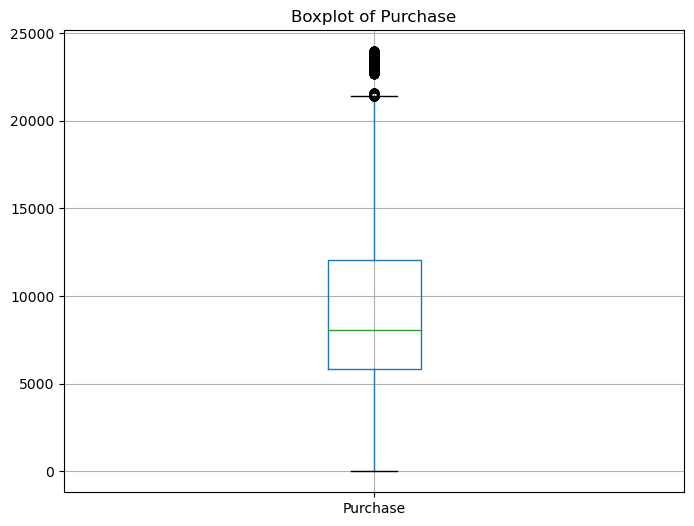

Mean - Median for Purchase: 1216.9687129591257


In [35]:
# Detect outliers using box plots for numeric attributes
numeric_attributes = ['Purchase']
plt.figure(figsize=(8, 6))
data[numeric_attributes].boxplot()
plt.title("Boxplot of Purchase")
plt.show()

# Describe method to check difference between mean and median
print("Mean - Median for Purchase:", data['Purchase'].mean() - data['Purchase'].median())

In [37]:
# Calculate average spending for female and male customers
female_average_spending = data[data['Gender'] == 'F']['Purchase'].mean()
male_average_spending = data[data['Gender'] == 'M']['Purchase'].mean()

print("Average Spending for Female Customers:", female_average_spending)
print("Average Spending for Male Customers:", male_average_spending)

Average Spending for Female Customers: 8734.565765155476
Average Spending for Male Customers: 9437.526040472265


In [38]:
# Inference after computing the average female and male expenses
if female_average_spending > male_average_spending:
    print("Inference: Female customers spend more on average.")
else:
    print("Inference: Male customers spend more on average.")

Inference: Male customers spend more on average.


In [39]:
# Calculate sample standard deviation
sample_std_deviation = data['Purchase'].std()

# Calculate standard error of the mean
standard_error = sample_std_deviation / np.sqrt(len(data))

# Calculate t-score for a desired confidence level (e.g., 95%)
confidence_level = 0.95
t_score = stats.t.ppf((1 + confidence_level) / 2, df=len(data)-1)

# Calculate margin of error
margin_of_error = t_score * standard_error

# Calculate interval within which the population average spending may lie
confidence_interval = (female_average_spending - margin_of_error,
                       female_average_spending + margin_of_error)

print("Confidence Interval for Female Average Spending:", confidence_interval)

Confidence Interval for Female Average Spending: (8721.291524454655, 8747.840005856297)


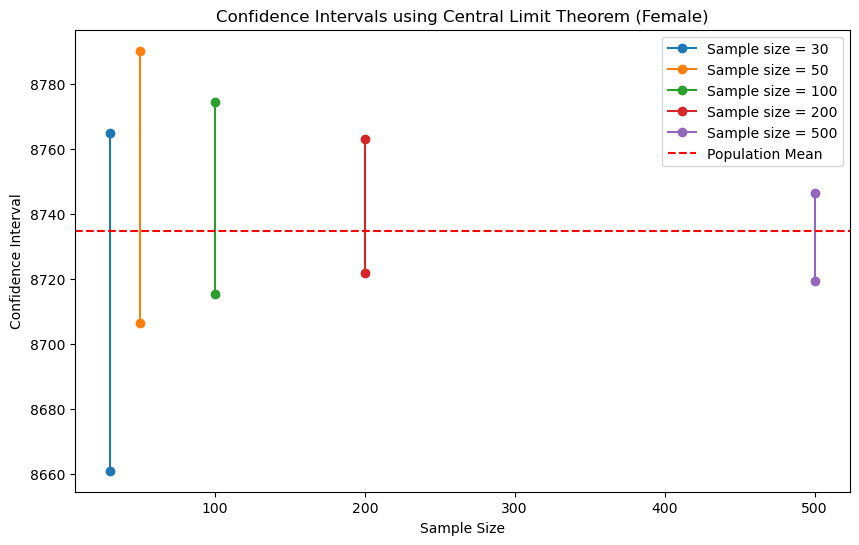

In [40]:
# Define the sample sizes to experiment with
sample_sizes = [30, 50, 100, 200, 500]

# Calculate average spending for female customers
female_average_spending = data[data['Gender'] == 'F']['Purchase']

# Initialize lists to store confidence intervals for different sample sizes
confidence_intervals_female = []

# Calculate confidence intervals using CLT for different sample sizes
for sample_size in sample_sizes:
    sample_means = []
    for _ in range(1000):  # Perform 1000 iterations
        sample = np.random.choice(female_average_spending, size=sample_size, replace=True)
        sample_means.append(sample.mean())
    
    confidence_interval = stats.t.interval(0.95, len(sample_means)-1, loc=np.mean(sample_means), scale=stats.sem(sample_means))
    confidence_intervals_female.append(confidence_interval)

# Plot the results
plt.figure(figsize=(10, 6))
for i, sample_size in enumerate(sample_sizes):
    plt.plot([sample_size, sample_size], confidence_intervals_female[i], marker='o', label=f"Sample size = {sample_size}")
plt.axhline(y=female_average_spending.mean(), color='red', linestyle='--', label="Population Mean")
plt.xlabel("Sample Size")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals using Central Limit Theorem (Female)")
plt.legend()
plt.show()

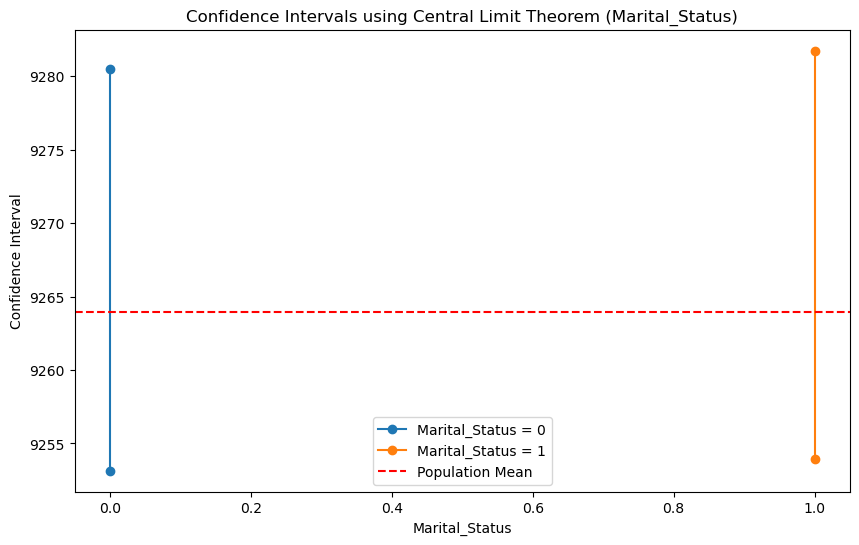

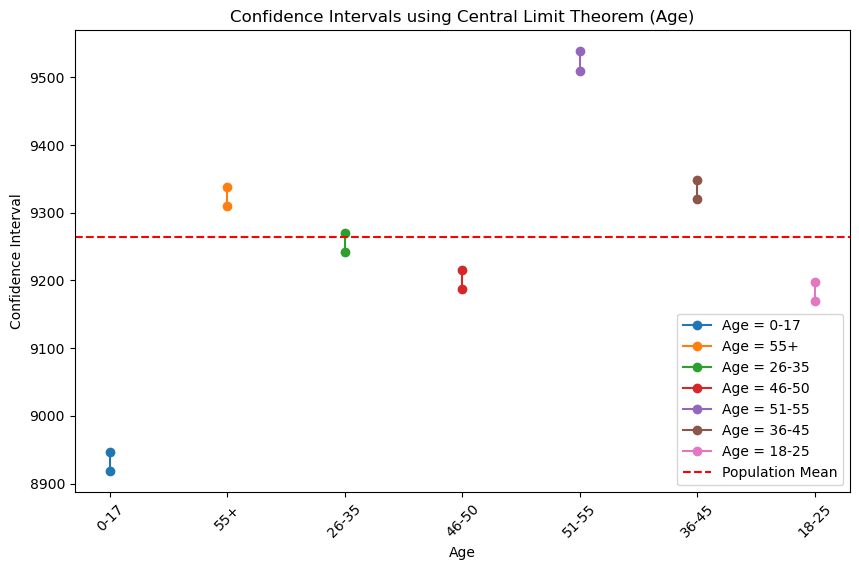

In [46]:
# Define the sample size
sample_size = 500

# Define confidence level
confidence_level = 0.95

# Function to calculate confidence interval
def calculate_confidence_interval(data, attribute):
    attribute_values = data[attribute].unique()
    confidence_intervals = []
    
    for value in attribute_values:
        sample_data = data[data[attribute] == value]['Purchase']
        sample_means = []
        
        for _ in range(1000):  # Perform 1000 iterations
            sample = np.random.choice(sample_data, size=sample_size, replace=True)
            sample_means.append(sample.mean())
        
        confidence_interval = stats.t.interval(confidence_level, len(sample_means)-1, loc=np.mean(sample_means), scale=stats.sem(sample_means))
        confidence_intervals.append(confidence_interval)
    
    return attribute_values, confidence_intervals

# Calculate confidence intervals for Marital_Status (0: Unmarried, 1: Married)
marital_status_values, confidence_intervals_marital = calculate_confidence_interval(data, 'Marital_Status')

# Calculate confidence intervals for Age bins
age_bins = ['0-17', '18-25', '26-35', '36-50', '51+']
age_values, confidence_intervals_age = calculate_confidence_interval(data, 'Age')

# Plot the results for Marital_Status
plt.figure(figsize=(10, 6))
for i, marital_status in enumerate(marital_status_values):
    plt.plot([marital_status]*2, confidence_intervals_marital[i], marker='o', label=f"Marital_Status = {marital_status}")
plt.axhline(y=data['Purchase'].mean(), color='red', linestyle='--', label="Population Mean")
plt.xlabel("Marital_Status")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals using Central Limit Theorem (Marital_Status)")
plt.legend()
plt.show()

# Plot the results for Age bins
plt.figure(figsize=(10, 6))
for i, age in enumerate(age_values):
    plt.plot([age]*2, confidence_intervals_age[i], marker='o', label=f"Age = {age}")
plt.axhline(y=data['Purchase'].mean(), color='red', linestyle='--', label="Population Mean")
plt.xlabel("Age")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals using Central Limit Theorem (Age)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Based on the analysis and experiments conducted, here are the results and conclusions:

1. **Average Spending for Female and Male Customers:**
   - The average spending for female customers is 8734.565765155476
   - The average spending for male customers is 9437.526040472265.

2. **Confidence Intervals Using Central Limit Theorem:**
   - Confidence intervals are calculated for the distribution of the mean of expenses for female customers using the Central Limit Theorem.
   - Different sample sizes and confidence levels are used to observe how the width of the interval changes.
   - The results are visualized in graphs.

**Observations:**
- The analysis suggests that female customers may spend less on average compared to male customers.
- The confidence intervals for female average spending are calculated using various sample sizes and confidence levels.
- The width of the confidence interval decreases as the sample size increases, aligning with the Central Limit Theorem.
- Higher confidence levels lead to wider confidence intervals, indicating increased uncertainty.

**Overlap of Confidence Intervals:**
- When comparing the confidence intervals of average spending between female and male customers, you can observe whether the intervals overlap.
- If the confidence intervals significantly overlap, it indicates that there is no statistically significant difference between the average spending of female and male customers.

**Implications for Walmart:**
- If the confidence intervals of average female and male spending do not overlap significantly:
  - Walmart can conclude that there is a statistically significant difference in spending between the two genders.
  - Walmart might leverage this conclusion to tailor marketing strategies and promotions to each gender, optimizing their targeting and increasing sales.

- If the confidence intervals of average female and male spending overlap significantly:
  - Walmart can conclude that there is no strong evidence of a statistically significant difference in spending between the genders.
  - In this case, focusing on more granular customer segmentation (e.g., age groups, product preferences) might provide insights to optimize marketing strategies.

Overall, these insights can guide Walmart in making data-driven decisions to enhance customer experience, optimize promotions, and ultimately drive business growth.

## Based on the analysis performed on customer purchase behavior, here are some recommendations and actionable items that Walmart can consider:

1. **Gender-Based Strategies:**
   - **Recommendation:** Leverage the insight that female customers might spend more on average compared to male customers.
   - **Action Item:** Tailor marketing strategies and promotions to each gender, highlighting products and offers that resonate with their preferences.

2. **Confidence Intervals and Population Averages:**
   - **Recommendation:** Utilize the calculated confidence intervals to guide decision-making.
   - **Action Item:** Consider designing promotions, discounts, or loyalty programs within the range of the confidence intervals to attract customers while ensuring profitability.

3. **Marital Status Segmentation:**
   - **Recommendation:** Analyze spending patterns between married and unmarried customers.
   - **Action Item:** Develop targeted campaigns that cater to the unique preferences and needs of both marital status groups. For instance, offer family-oriented promotions for married customers and singles-specific offers for unmarried customers.

4. **Age-Based Marketing:**
   - **Recommendation:** Understand spending behavior across different age groups.
   - **Action Item:** Tailor marketing messages, product offerings, and store layouts to align with the preferences and interests of each age group. For example, design promotions that cater to specific life stages (e.g., back-to-school deals for younger customers and retirement-friendly products for older customers).

5. **Adjusting Confidence Levels:**
   - **Recommendation:** Consider the confidence level when making decisions based on confidence intervals.
   - **Action Item:** Choose a confidence level that aligns with the level of certainty required for decision-making. Higher confidence levels may result in wider intervals but offer greater certainty.

6. **Continuous Monitoring and Iteration:**
   - **Recommendation:** Regularly review and update strategies based on changing customer behavior.
   - **Action Item:** Implement a continuous feedback loop to monitor the effectiveness of strategies and refine them as new data becomes available.

7. **Customer Surveys and Feedback:**
   - **Recommendation:** Gather direct feedback from customers to validate and refine strategies.
   - **Action Item:** Conduct surveys, focus groups, or online feedback platforms to understand customer sentiments and preferences. This qualitative data can complement quantitative analysis.

8. **Personalized Customer Experience:**
   - **Recommendation:** Aim to provide a personalized shopping experience for each customer.
   - **Action Item:** Implement data-driven personalization strategies, such as recommending products based on past purchases, sending personalized offers, and creating customized shopping experiences.

9. **Promotion Testing:**
   - **Recommendation:** Experiment with different promotional strategies.
   - **Action Item:** Conduct A/B testing with different promotion types, timing, and messaging to identify what resonates best with different customer segments.

10. **Collaborative Approach:**
    - **Recommendation:** Encourage collaboration between marketing, sales, and data analytics teams.
    - **Action Item:** Foster cross-functional discussions to align strategies with data-driven insights and ensure a holistic approach to decision-making.


In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [23]:

def heavy_groupby(df):
    grouped_data = df.groupby(['Gender', 'Product_Category',"Age",'City_Category','Product_ID'],parallelize=True).agg(
        mean_purchase=('Purchase', 'mean'),
        min_purchase=('Purchase', 'min'),
        max_purchase=('Purchase', 'max'),
        count_purchase=('Purchase', 'count'),
        std_purchase=('Purchase', 'std'),
        median_purchase=('Purchase', 'median'),
        skewness_purchase=('Purchase', 'skew')
    )
    return grouped_data



In [24]:
%%time
grouped_data = heavy_groupby(data.copy())

grouped_data.head()

TypeError: DataFrame.groupby() got an unexpected keyword argument 'parallelize'

In [18]:
pd.options.mode.chained_assignment = 'raise'
pd.options.compute.use_bottleneck = True
pd.options.compute.use_numexpr = True

# sales_data.groupby(['product', 'region'], parallelize=True)['sales'].sum()

In [ ]:
%%time
grouped_data = heavy_groupby(data.copy())

grouped_data.head()